**Importing** **Libraries** 

In [1]:
import numpy as np
import torch
import torchvision

###Import Dataset CIFAR-10

In [2]:
trainingdata = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
                       transform=torchvision.transforms.Compose([
                           torchvision.transforms.Grayscale(num_output_channels=1),torchvision.transforms.ToTensor()
                       ]))

testdata = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,
                       transform=torchvision.transforms.Compose([
                           torchvision.transforms.Grayscale(num_output_channels=1),torchvision.transforms.ToTensor()
                       ]))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
print(len(trainingdata))
print(len(testdata))

50000
10000


In [4]:
for data in trainingdata:
  print(data)
  break

(tensor([[[0.2392, 0.1765, 0.1882,  ..., 0.5373, 0.5098, 0.5059],
         [0.0745, 0.0000, 0.0392,  ..., 0.3725, 0.3529, 0.3686],
         [0.0941, 0.0353, 0.1216,  ..., 0.3529, 0.3569, 0.3137],
         ...,
         [0.6784, 0.6039, 0.6157,  ..., 0.5255, 0.1412, 0.1490],
         [0.5725, 0.5059, 0.5647,  ..., 0.6000, 0.2706, 0.2353],
         [0.5922, 0.5373, 0.5765,  ..., 0.7412, 0.4863, 0.3882]]]), 6)


In [5]:
data[0][0].shape ## shape of matrix of single image

torch.Size([32, 32])

In [6]:
image, label = trainingdata[0]
print(image.shape, label)

torch.Size([1, 32, 32]) 6


In [7]:
trainingdata[0][1]

6

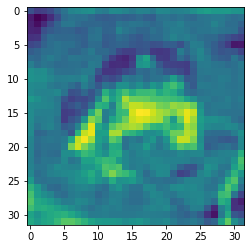

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image.squeeze().numpy())
plt.show()

In [9]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

In [10]:
for data in trainDataLoader:
  print(data)
  break

[tensor([[[[0.4118, 0.4353, 0.4471,  ..., 0.4745, 0.4784, 0.4706],
          [0.5098, 0.5922, 0.5961,  ..., 0.6667, 0.6902, 0.6549],
          [0.5176, 0.5961, 0.6000,  ..., 0.6784, 0.6980, 0.6588],
          ...,
          [0.4706, 0.5333, 0.5569,  ..., 0.6275, 0.6118, 0.6275],
          [0.4627, 0.5294, 0.5529,  ..., 0.6745, 0.6667, 0.6235],
          [0.3804, 0.3922, 0.4039,  ..., 0.4627, 0.4549, 0.4314]]],


        [[[0.2039, 0.2549, 0.2314,  ..., 0.3725, 0.3490, 0.3412],
          [0.2745, 0.2980, 0.2667,  ..., 0.4824, 0.4157, 0.5059],
          [0.3373, 0.3098, 0.2549,  ..., 0.3569, 0.3373, 0.4235],
          ...,
          [0.4275, 0.4039, 0.3490,  ..., 0.5882, 0.6392, 0.6471],
          [0.3333, 0.3490, 0.3098,  ..., 0.6196, 0.6392, 0.6314],
          [0.2941, 0.3294, 0.3961,  ..., 0.6314, 0.5765, 0.6235]]],


        [[[0.1098, 0.0784, 0.0824,  ..., 0.0157, 0.0196, 0.0314],
          [0.1020, 0.0941, 0.0941,  ..., 0.0157, 0.0314, 0.0353],
          [0.0902, 0.1020, 0.1098,  .

In [11]:
data[0][1].shape

torch.Size([1, 32, 32])

In [12]:
data[1][0].shape



torch.Size([])

<built-in method size of Tensor object at 0x7f1c67a1d710>


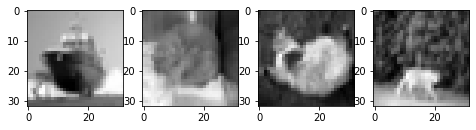

In [13]:
images, labels = iter(trainDataLoader).next()
print(labels.size)
plt.figure(figsize=(10,4))
for index in np.arange(1,5):
  plt.subplot(1,5, index+1)
  plt.imshow(images[index].squeeze().numpy(), cmap=plt.cm.gray)

###Modelling Neural Network

In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [17]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(32*32, 256)
    self.linear2 = nn.Linear(256, 128)
    self.linear3 = nn.Linear(128, 64)
    self.linear4 = nn.Linear(64, 10)
  
  def forward(self, x):
    x = x.view(-1,32*32)
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = F.relu(self.linear3(x))
    x = self.linear4(x)
    return F.log_softmax(x, dim=1)

net = Net().cuda()
Loss = torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
 



In [43]:
train_loss_history = []
test_loss_history = []
train_acc_history = []
test_acc_history = []

for epoch in range(10):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    y=torch.zeros(len(labels),10)
    y[range(y.shape[0]), labels]=1
    y=y.cuda()
    optimizer.zero_grad()
    predicted_output = net(images)
    fit = Loss(predicted_output,y)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      y=torch.zeros(len(labels),10)
      y[range(y.shape[0]), labels]=1
      y=y.cuda()
      predicted_output = net(images)
      fit = Loss(predicted_output,y)
      test_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  
  correct_points_train = 0
  correct_points_test = 0
  correct_points_train +=(torch.eq(torch.max(predicted_output, 1)
  [1],labels).sum()).data.cpu().numpy()
  correct_points_test +=(torch.eq(torch.max(predicted_output, 1)
  [1],labels).sum()).data.cpu().numpy()
  train_acc = correct_points_train/len(trainDataLoader)
  test_acc = correct_points_test/len(testDataLoader)
  train_acc_history.append(train_acc)
  test_acc_history.append(test_acc)
  print('Epoch %s, Train loss %s, Test loss %s, Train Accuracy %s, Test Accuracy %s'%(epoch, train_loss, test_loss, train_acc, test_acc))

Epoch 0, Train loss 5.859268964099153, Test loss 5.859365262802998, Train Accuracy 0.0025575447570332483, Test Accuracy 0.012738853503184714
Epoch 1, Train loss 5.859259132229154, Test loss 5.859348421643494, Train Accuracy 0.0038363171355498722, Test Accuracy 0.01910828025477707
Epoch 2, Train loss 5.859248351562968, Test loss 5.859335516668429, Train Accuracy 0.0038363171355498722, Test Accuracy 0.01910828025477707
Epoch 3, Train loss 5.859237897731459, Test loss 5.859327641262371, Train Accuracy 0.0038363171355498722, Test Accuracy 0.01910828025477707
Epoch 4, Train loss 5.859226314003205, Test loss 5.859316725639781, Train Accuracy 0.0038363171355498722, Test Accuracy 0.01910828025477707
Epoch 5, Train loss 5.859217657762415, Test loss 5.859307869224791, Train Accuracy 0.0038363171355498722, Test Accuracy 0.01910828025477707
Epoch 6, Train loss 5.859206458796626, Test loss 5.859301500259691, Train Accuracy 0.0038363171355498722, Test Accuracy 0.01910828025477707
Epoch 7, Train loss

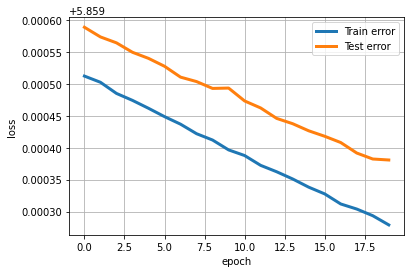

In [40]:
plt.plot(range(20),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(20),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [41]:
 print("Accuracy: ",(torch.eq(torch.max(predicted_output, 1)
 [1],labels).sum()/len(labels)*100).data.cpu().numpy())


Accuracy:  18.75


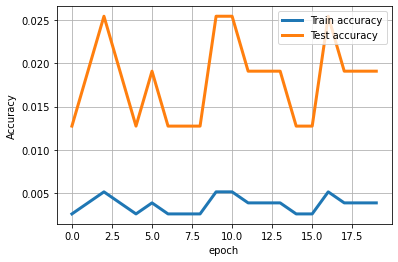

In [42]:
plt.plot(range(20),train_acc_history,'-',linewidth=3,label='Train accuracy')
plt.plot(range(20),test_acc_history,'-',linewidth=3,label='Test accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()